## Author : Quratulain
### Task 1 : Prediction using Supervised Machine Learning
* In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they     studied.
* This is a simple linear regression task as it involves just two variables.

### Tools Prepration and Library

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

In [6]:
data = pd.read_csv('student_scores - student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# shape of the data
data.shape

(25, 2)

In [9]:
# check the type of data
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization
* Plotting the data points to understand the overall distribution

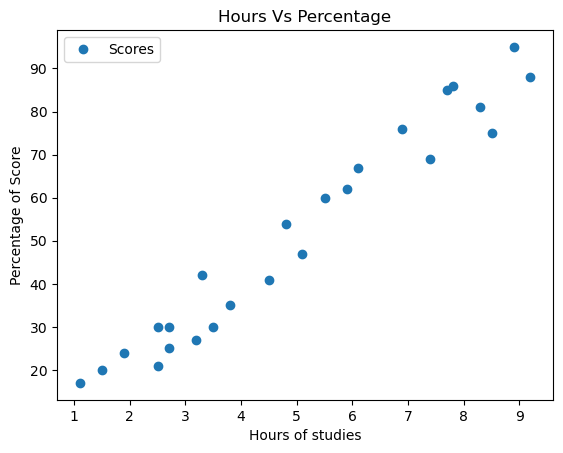

In [11]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours of studies')
plt.ylabel('Percentage of Score')
plt.show()

 * from the graph, we can see that there is a positive linear relationship between the number of hours studied and the percentage of score. This means that as the number of hours studied increases, the percentage of score tends to increase as well.

## Model

* This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

# Split the data into train test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Train the model

In [27]:
model = LinearRegression()
model.fit(X_train.reshape(-1,1),Y_train)
print('Training Complete')
y_predict= model.predict(X_train)

Training Complete


### Plotting the line of regression

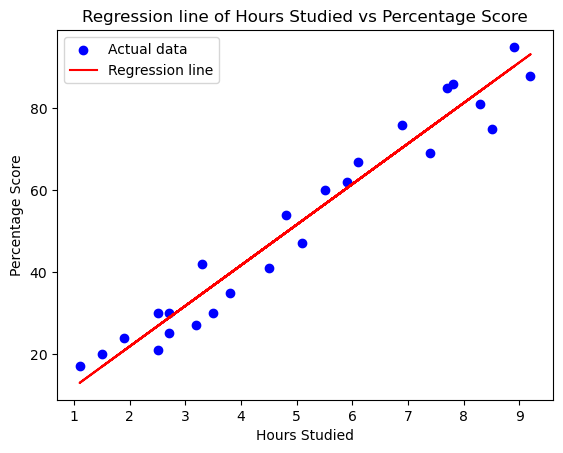

In [37]:
# Scatter plot of actual data points
plt.scatter(X, Y, color='blue', label='Actual data')

# Predictions from the trained model
predictions = model.predict(X)

# Plot the best-fit line of regression
plt.plot(X, predictions, color='red', label='Regression line')

# Labels and title
plt.title('Regression line of Hours Studied vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

## Accuracy Score

In [29]:
print('Test Score')
model.score(X_test,Y_test)

Test Score


0.9454906892105354

In [30]:
print('Train Score')
model.score(X_train,Y_train)

Train Score


0.9515510725211552

In [48]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [46]:
y_predict[:5] # train value

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217])

In [40]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual vs Predicted`m

In [42]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


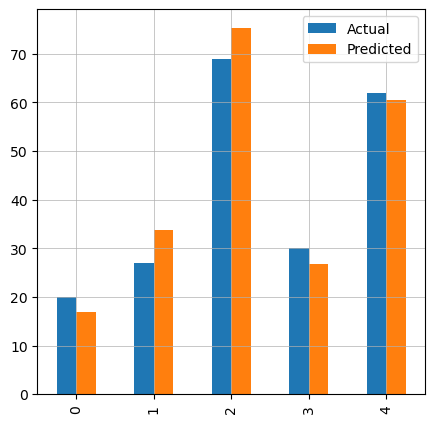

In [43]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5')

## Evaluating the model

* This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [52]:
print('R-2', metrics.r2_score(Y_test,y_pred))
print('Mean-Absolute-Error', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean-Squared-Error', metrics.mean_squared_error(Y_test,y_pred))
print('Root-Mean-Squared-Error',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

R-2 0.9454906892105354
Mean-Absolute-Error 4.183859899002982
Mean-Squared-Error 21.598769307217456
Root-Mean-Squared-Error 4.647447612100373


* These metrics collectively give insight into the performance and accuracy of your regression model, with lower values of MAE, MSE, and RMSE being desirable, and higher values of R-squared indicating a better fit of the model to the data.







## Testing the model with our own data

In [56]:
# what will be the predicted score if a student studies for 9.25hrs/day?
hours_studied = [[9.25]]  # 2D array as scikit-learn expects
own_predictions = model.predict(hours_studied)
print("Predicted score if the student studies for 9.25 hours/day:", own_predictions[0])

Predicted score if the student studies for 9.25 hours/day: 93.69173248737539


## Summary 
### I've conducted supervised machine learning to predict outcomes and evaluated the model's performance using various metrics.
## Thank-you